<a href="https://colab.research.google.com/github/petronilia-allorerung/EDA_Employees_Performance/blob/main/Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Reading

In [ ]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#read data from a csv file
df = pd.read_csv('employees_dataset.csv')

In [ ]:
#display the dataframe
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
#displaying the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


### Data Cleaning

In [ ]:
#removing columns that are not used
df=df.drop(['region','KPIs_met_more_than_80', 'awards_won', 'avg_training_score' ], axis=1)

In [ ]:
#display info about the number of columns and rows in tha table
df.shape

(17417, 9)

In [ ]:
#checking missing values/null values
df.isnull().sum()

employee_id                0
department                 0
education                771
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1363
length_of_service          0
dtype: int64

In [ ]:
#drop rows with missing values
df = df.dropna(axis=0)

In [ ]:
#checking again missing values/null values
df.isnull().sum()

employee_id             0
department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
dtype: int64

In [ ]:
#checking for duplicated values
df.duplicated().sum()

2

In [ ]:
#displaying duplicated values
df[df.duplicated()]

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service
17414,49584,HR,Bachelors,m,other,1,33,1.0,9
17415,49584,HR,Bachelors,m,other,1,33,1.0,9


In [ ]:
#drop duplicated values
df = df.drop_duplicates()

In [ ]:
#checking again duplicated values
df.duplicated().sum()

0

In [ ]:
#viewing the number of unique data in the 'department' column
df['department'].nunique()

9

In [ ]:
#viewing the name of unique data in the 'department' column
df['department'].value_counts(normalize=True)

department
Sales & Marketing    0.298340
Operations           0.212943
Procurement          0.134678
Technology           0.128647
Analytics            0.093114
HR                   0.047854
Finance              0.046427
R&D                  0.019388
Legal                0.018610
Name: proportion, dtype: float64

In [ ]:
#replacing the values of the 'department' column
df['department'] = df['department'].replace('HR', 'Human Resources')
df['department'] = df['department'].replace('R&D', 'Research & Development')


<ipython-input-79-d81355272759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].replace('HR', 'Human Resources')
<ipython-input-79-d81355272759>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['department'] = df['department'].replace('R&D', 'Research & Development')


In [ ]:
#viewing the number of unique data in the 'gender' column
df['gender'].nunique()

2

In [ ]:
#replacing the values of the 'gender' column
df['gender'] = df['gender'].replace('f', 'Female')
df['gender'] = df['gender'].replace('m', 'Male')

In [ ]:
#change the first letter to capitalize for recuitment channel and education columns
df['recruitment_channel'] = df['recruitment_channel'].str.title()
df['education'] = df['education'].str.title()

In [ ]:
#convert data type to int for previous_year_rating column
df['previous_year_rating'] = df['previous_year_rating'].astype('int')

In [ ]:
#displaying the final dataframe
df.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service
1,74430,Human Resources,Bachelors,Female,Other,1,31,3,5
2,72255,Sales & Marketing,Bachelors,Male,Other,1,31,1,4
3,38562,Procurement,Bachelors,Female,Other,3,31,2,9
4,64486,Finance,Bachelors,Male,Sourcing,1,30,4,7
5,46232,Procurement,Bachelors,Male,Sourcing,1,36,3,2


### Descriptive Statistics

In [ ]:
#descriptive statistics of the dataframe
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service
count,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000
mean,39084.521139,1.247504,35.632084,3.355337,6.258138
std,22714.843507,0.588582,7.577190,1.263761,4.115930
min,3.000000,1.000000,20.000000,1.000000,1.000000
25%,19321.250000,1.000000,30.000000,3.000000,3.000000
50%,39049.500000,1.000000,34.000000,3.000000,5.000000
75%,58933.250000,1.000000,39.000000,4.000000,8.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000


### Barchart

In [ ]:
df.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service
1,74430,Human Resources,Bachelors,Female,Other,1,31,3,5
2,72255,Sales & Marketing,Bachelors,Male,Other,1,31,1,4
3,38562,Procurement,Bachelors,Female,Other,3,31,2,9
4,64486,Finance,Bachelors,Male,Sourcing,1,30,4,7
5,46232,Procurement,Bachelors,Male,Sourcing,1,36,3,2


In [ ]:
#creating a function for make a bar chart
def barchart(column):
  count = df[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize=(15,5))
  plt.bar(index, values, color='maroon', width=0.3)

  column = column.title()

  plt.xlabel(column)
  plt.ylabel('Number of Employees')
  plt.title("Comparison Chart of Employee's "+ column)

  plt.show()

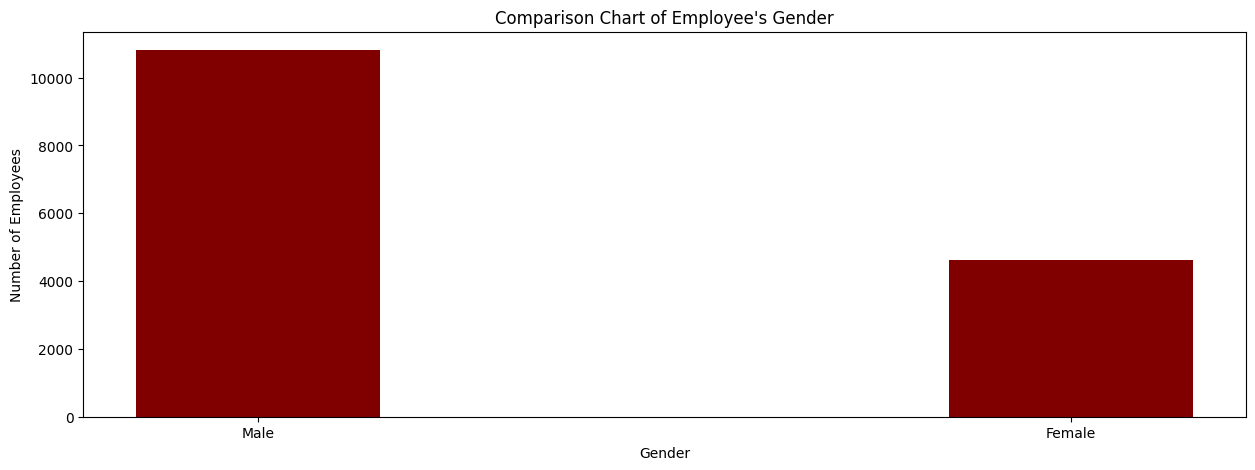

In [ ]:
#barchart for gender column
barchart('gender')

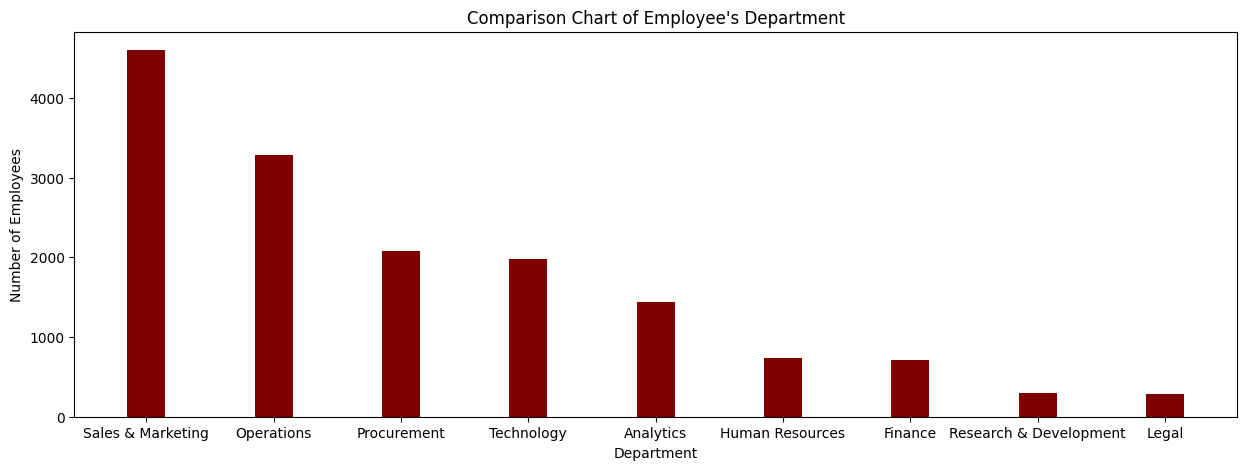

In [ ]:
#barchart for department column
barchart('department')

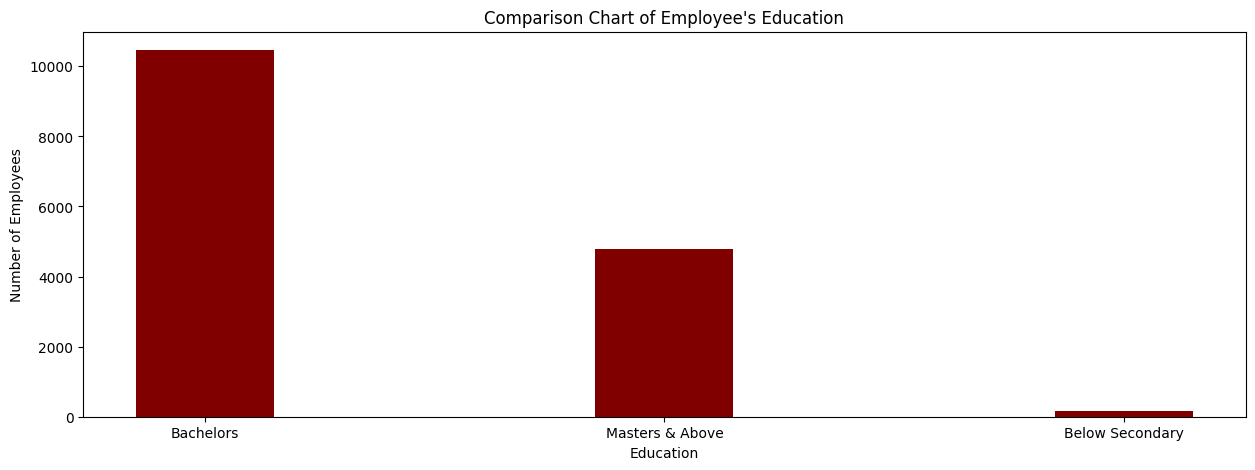

In [ ]:
#barchart for education column
barchart('education')

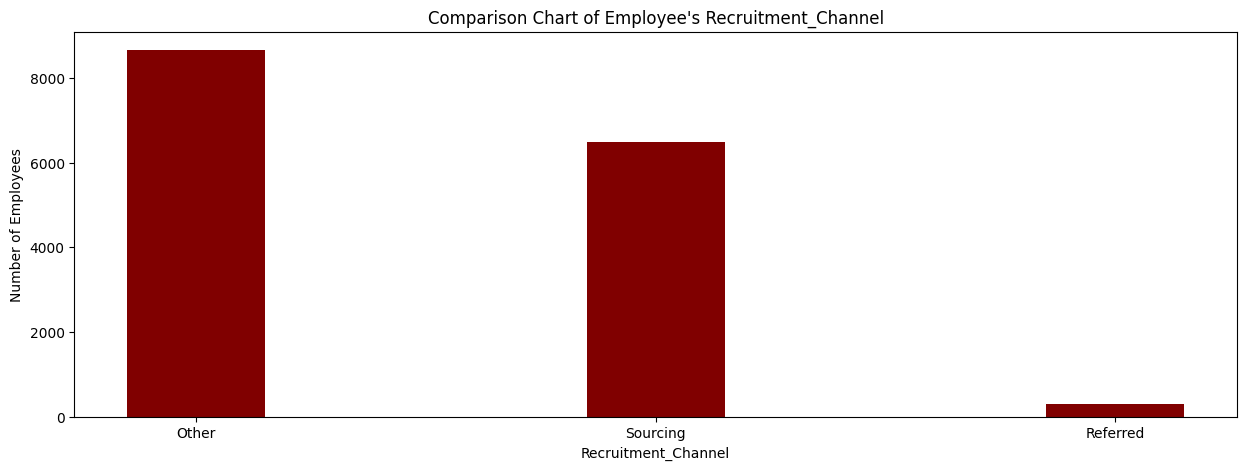

In [ ]:
#barchart for recruitment channel column
barchart('recruitment_channel')

In [ ]:
#create a bar chart function to find out the number of features based on the previous year rating
def group_barchart(column):
  rating = df.groupby(['previous_year_rating', column]).count()['employee_id'].reset_index()

  g = sns.catplot(
      data=rating, kind="bar",
      x="previous_year_rating", y="employee_id", hue=column,
      palette="dark", height=5)

  g.set_axis_labels('Previous Year Rating', 'Number of Employees')

  plt.show()

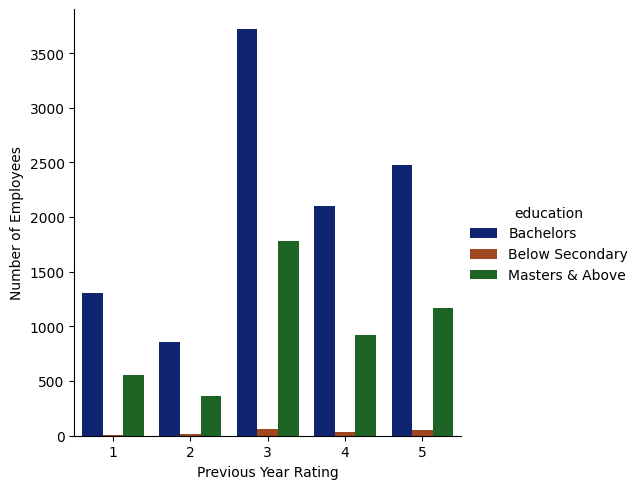

In [ ]:
group_barchart('education')

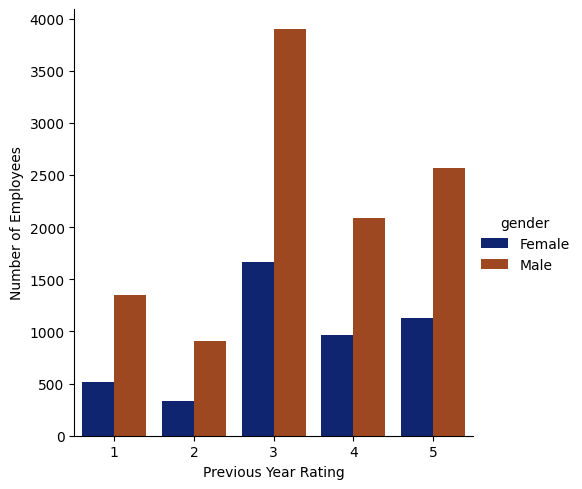

In [ ]:
group_barchart('gender')

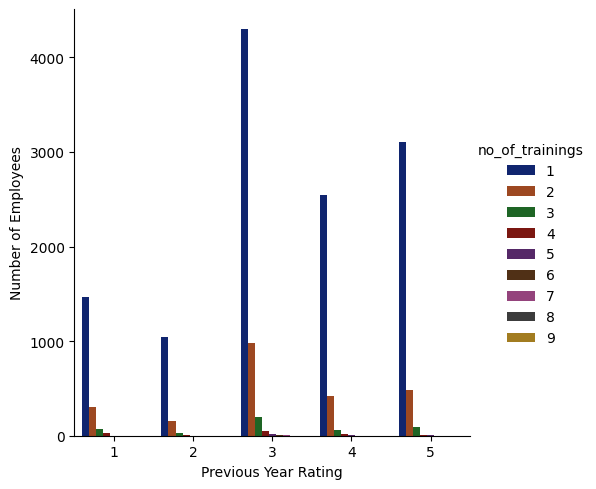

In [ ]:
group_barchart('no_of_trainings')

### Histogram

In [ ]:
#creating a histogram
def histogram(column):
  plt.hist(df[column], color="maroon")

  column = column.title()
  plt.xlabel("Employee " + column)
  plt.ylabel('Number of Employees')
  plt.title("Comparison Chart of Employee's "+ column)


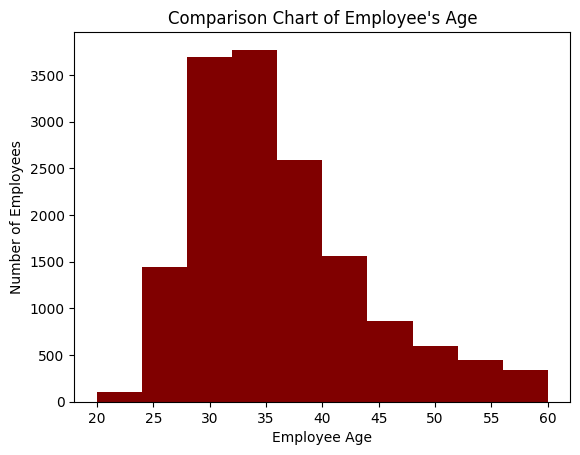

In [ ]:
histogram('age')

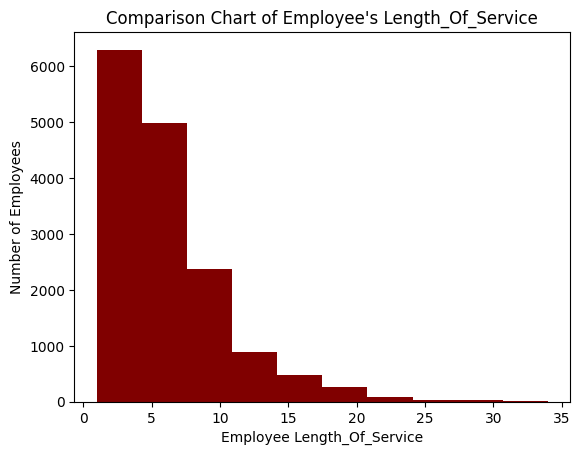

In [ ]:
histogram('length_of_service')

### Boxplot

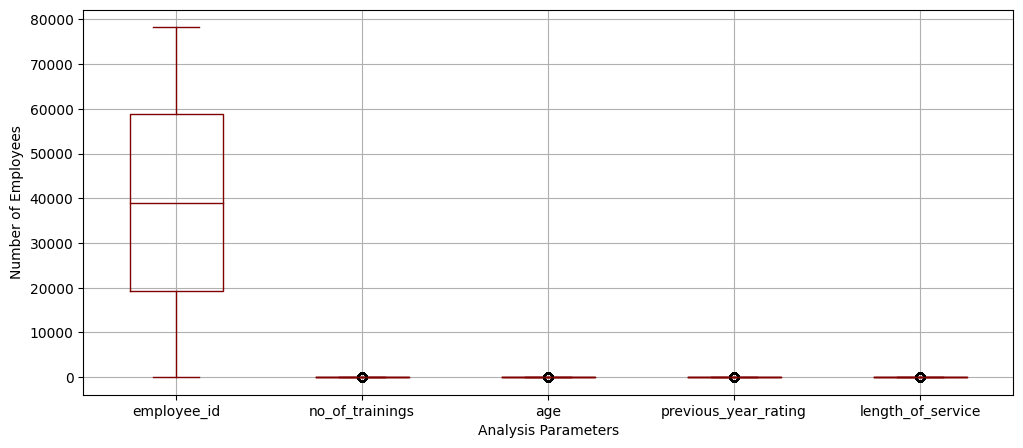

In [ ]:
# Creating a box plot for all columns
plt.figure(figsize=(12,5))
df.boxplot(color='maroon')

#adding labels to x-axis dan y-axis
plt.xlabel('Analysis Parameters')
plt.ylabel('Number of Employees')

#display the box plot
plt.show()

<Axes: >

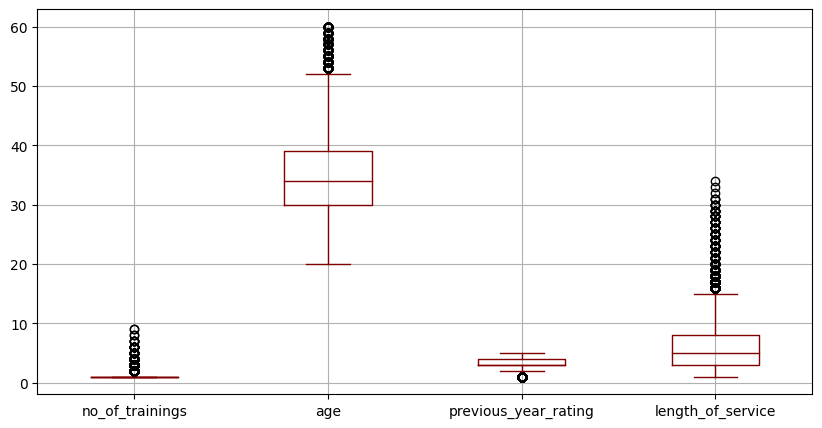

In [ ]:
#checking the outlier we can see at the box plot
plt.figure(figsize=(10,5))
df.boxplot(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service'], color='maroon')

In [ ]:
#analysis the outliers based on flight distance
df.loc[df['length_of_service'] == 34]

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service
11978,71243,Operations,Bachelors,Male,Other,1,60,3,34


In [ ]:
df_numerik = df.select_dtypes(include=['number'])
df_numerik = df_numerik.drop(columns=['employee_id'])
df_korelasi = df_numerik.corr(method='pearson')
df_korelasi

,no_of_trainings,age,previous_year_rating,length_of_service
no_of_trainings,1.000000,-0.085986,-0.053382,-0.056007
age,-0.085986,1.000000,0.017243,0.601181
previous_year_rating,-0.053382,0.017243,1.000000,0.008283
length_of_service,-0.056007,0.601181,0.008283,1.000000


### Heatmap

<Axes: >

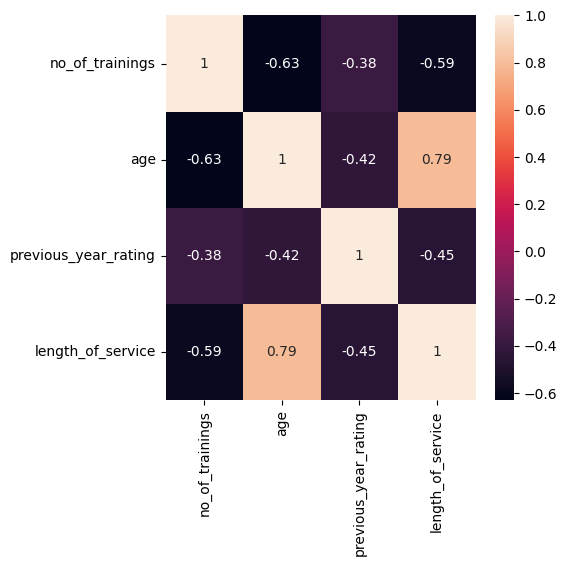

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df_korelasi.corr(), annot=True)

### Chi Square

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#create function for checking correlation between a column and b column

#create a contigency table
def chi_square(a,b):
  contingency_table = pd.crosstab(df[a], df[b])

  #perform chi-quare test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  #result
  print(f'Chi Square Values: {chi2}')
  print(f'P-Value: {p}')

  #determine if the result is significant
  if p < 0.05:
    print('Reject HO = There is a significant relationship')
  else:
    print('Accept HO = There is no significant relationship')

In [ ]:
#correlation between 'age' column and 'no of trainings' column
chi_square('age', 'no_of_trainings')

Chi Square Values: 425.5655577497614
P-Value: 6.899330284996987e-05
Reject HO = There is a significant relationship


In [ ]:
#correlation between 'age' column and 'length of service' column
chi_square('age', 'length_of_service')

Chi Square Values: 17980.549271562795
P-Value: 0.0
Reject HO = There is a significant relationship


In [ ]:
#correlation between 'length of service' column and 'no of trainings'
chi_square('length_of_service', 'no_of_trainings')

Chi Square Values: 171.51156906906584
P-Value: 0.9999978181744087
Accept HO = There is no significant relationship


### Pivot Table

gender             Female      Male
education                          
Bachelors        3.406808  3.317290
Below Secondary  3.508772  3.684685
Masters & Above  3.395942  3.361435


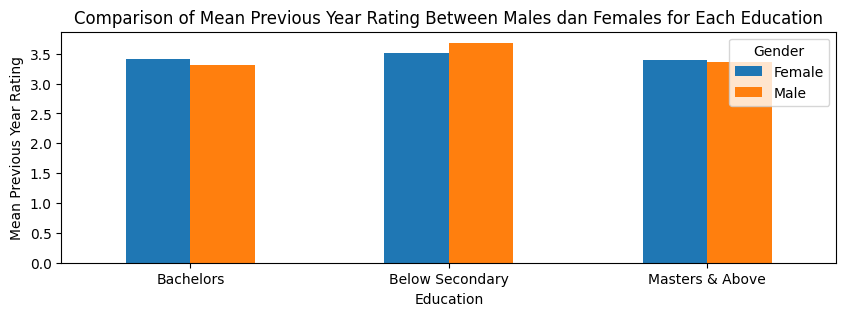

In [ ]:
#creating pivot table
pivot_table = df.pivot_table(index='education', columns='gender', values='previous_year_rating', aggfunc='mean')

print(pivot_table)

#plotting the pivot table as a bar chart
pivot_table.plot(kind='bar', figsize=(10,3))
plt.xlabel('Education')
plt.ylabel('Mean Previous Year Rating')
plt.title('Comparison of Mean Previous Year Rating Between Males dan Females for Each Education')
plt.xticks(rotation=0) #rotating x-axis labels for better readibility
plt.legend(title='Gender')
plt.show()